The Smoking and Drinking Dataset with Body Signal is a valuable resource for predictive analysis aimed at identifying individuals who smoke and consume alcoholic beverages based on their body signal data. This dataset is a product of the National Health Insurance Service in Korea, and it has been carefully curated to ensure the exclusion of any personal information or sensitive data,
Its includes a wide range of variables, encompassing metrics such as age, height, weight, blood pressure, cholesterol levels, and many more. These metrics are essential for understanding the physiological characteristics of individuals in the dataset. Additionally, the dataset includes information about smoking status, drinking habits, and various body signal measurements.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
upload = files.upload()

Saving smoking_driking_dataset_Ver01.csv to smoking_driking_dataset_Ver01.csv


In [4]:
import io
drink =pd.read_csv(io.BytesIO(upload['smoking_driking_dataset_Ver01.csv']))

In [5]:
from google.colab import files
upload = files.upload()

Saving smoking_driking_dataset_Ver01.csv to smoking_driking_dataset_Ver01 (1).csv


In [7]:
import io
smoke= pd.read_csv(io.BytesIO(upload['smoking_driking_dataset_Ver01 (1).csv']))

In [8]:
drink.shape

(50000, 25)

In [9]:
drink.head(10)

,Unnamed: 0,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,907693,Female,20,160,80,87.0,0.4,0.4,1.0,1.0,...,86.0,56.0,12.0,1.0,0.8,12.0,12.0,16.0,1.0,N
1,287742,Male,30,170,65,76.0,0.7,1.0,1.0,1.0,...,123.0,33.0,14.1,1.0,0.9,17.0,13.0,11.0,1.0,N
2,284105,Male,35,185,85,86.0,0.4,0.2,1.0,1.0,...,83.0,105.0,15.6,1.0,1.2,19.0,19.0,30.0,1.0,Y
3,38943,Female,60,155,60,85.0,1.0,0.8,1.0,1.0,...,107.0,114.0,14.5,1.0,0.7,29.0,26.0,29.0,1.0,N
4,40248,Male,40,155,60,78.8,1.0,0.5,1.0,1.0,...,112.0,84.0,15.8,1.0,0.7,18.0,17.0,39.0,1.0,N
5,910340,Female,40,165,55,64.2,1.0,1.2,1.0,1.0,...,67.0,73.0,13.5,1.0,0.7,26.0,14.0,12.0,1.0,N
6,663526,Male,45,170,70,81.0,0.9,0.8,1.0,1.0,...,128.0,169.0,16.7,1.0,0.8,17.0,19.0,26.0,3.0,Y
7,637480,Female,45,155,50,67.0,0.3,0.2,1.0,1.0,...,128.0,85.0,13.6,1.0,0.7,17.0,9.0,12.0,1.0,N
8,600516,Male,45,175,65,78.7,1.0,1.0,1.0,1.0,...,99.0,78.0,13.9,1.0,1.1,21.0,16.0,17.0,1.0,Y
9,149454,Male,40,175,75,92.0,1.5,1.5,1.0,1.0,...,137.0,73.0,12.0,1.0,0.9,15.0,14.0,11.0,1.0,Y


In [10]:
drink.describe()

,Unnamed: 0,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,495482.532020,47.554800,162.264500,63.255100,81.217812,0.98429,0.976056,1.031160,1.029900,122.518920,...,56.945560,113.113140,131.971180,14.236432,1.095260,0.862490,25.928580,25.859940,37.103120,1.606600
std,286519.106374,14.203451,9.275789,12.449374,11.890719,0.63158,0.590159,0.173752,0.170313,14.573681,...,15.036581,35.747604,100.372138,1.587288,0.442978,0.578108,16.769321,34.228255,49.228851,0.818419
min,30.000000,20.000000,130.000000,25.000000,30.000000,0.10000,0.100000,1.000000,1.000000,72.000000,...,1.000000,1.000000,6.000000,3.900000,1.000000,0.100000,2.000000,1.000000,1.000000,1.000000
25%,246210.750000,35.000000,155.000000,55.000000,74.400000,0.70000,0.700000,1.000000,1.000000,112.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,494460.500000,45.000000,160.000000,60.000000,81.000000,1.00000,1.000000,1.000000,1.000000,121.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,744046.000000,60.000000,170.000000,70.000000,87.500000,1.20000,1.200000,1.000000,1.000000,131.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000
max,991322.000000,85.000000,190.000000,130.000000,999.000000,9.90000,9.900000,2.000000,2.000000,224.000000,...,520.000000,1580.000000,2629.000000,20.800000,6.000000,80.000000,794.000000,4633.000000,999.000000,3.000000


In [11]:
drink.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50000 non-null  int64  
 1   sex               50000 non-null  object 
 2   age               50000 non-null  int64  
 3   height            50000 non-null  int64  
 4   weight            50000 non-null  int64  
 5   waistline         50000 non-null  float64
 6   sight_left        50000 non-null  float64
 7   sight_right       50000 non-null  float64
 8   hear_left         50000 non-null  float64
 9   hear_right        50000 non-null  float64
 10  SBP               50000 non-null  float64
 11  DBP               50000 non-null  float64
 12  BLDS              50000 non-null  float64
 13  tot_chole         50000 non-null  float64
 14  HDL_chole         50000 non-null  float64
 15  LDL_chole         50000 non-null  float64
 16  triglyceride      50000 non-null  float6

In [12]:
drink.isnull() .sum()

Unnamed: 0          0
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

In [13]:
drink['DRK_YN'].describe()

count     50000
unique        2
top           N
freq      25110
Name: DRK_YN, dtype: object

**Age Distribution**,

**Highest age of drinkers**

<function matplotlib.pyplot.show(close=None, block=None)>

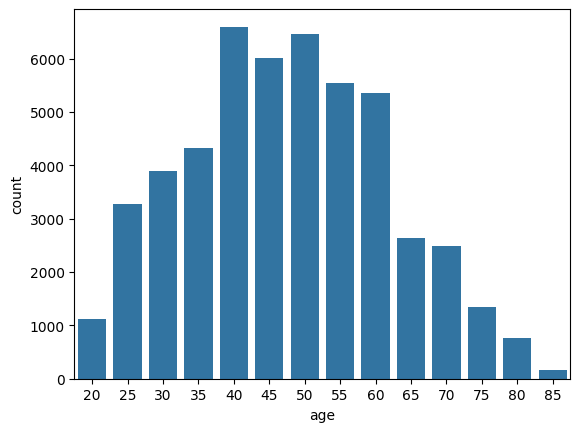

In [14]:
sns.countplot(x=drink['age'])
#plt.title('')
plt.show

Is there a normal distribution or not? ,

**Normal Distribution by DRK_YN**

<ipython-input-18-749e4ee586eb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(drink['DRK_YN'])


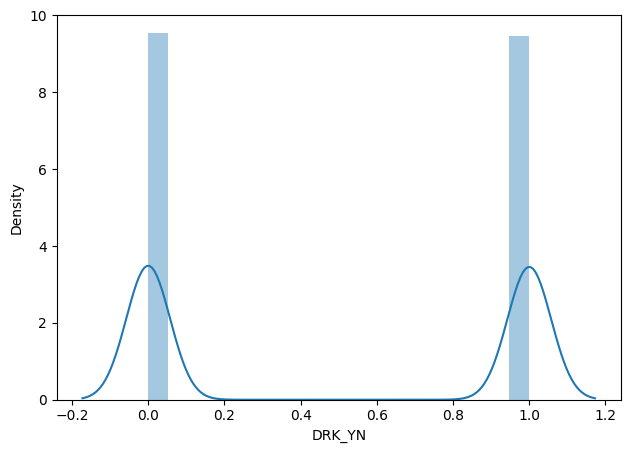

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(drink['DRK_YN'])
plt.show()

**Drinking Distribution**,

 (**Drinker =Y ,Not Drinker =N**)

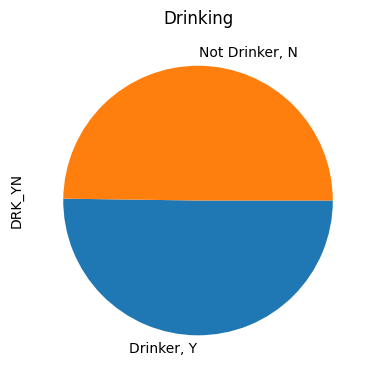

In [19]:
plt.figure(figsize=(20,20))
plt.subplot(1, 4, 4)
labels = ['Drinker, Y', 'Not Drinker, N']
drink['DRK_YN'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Drinking')

plt.show()


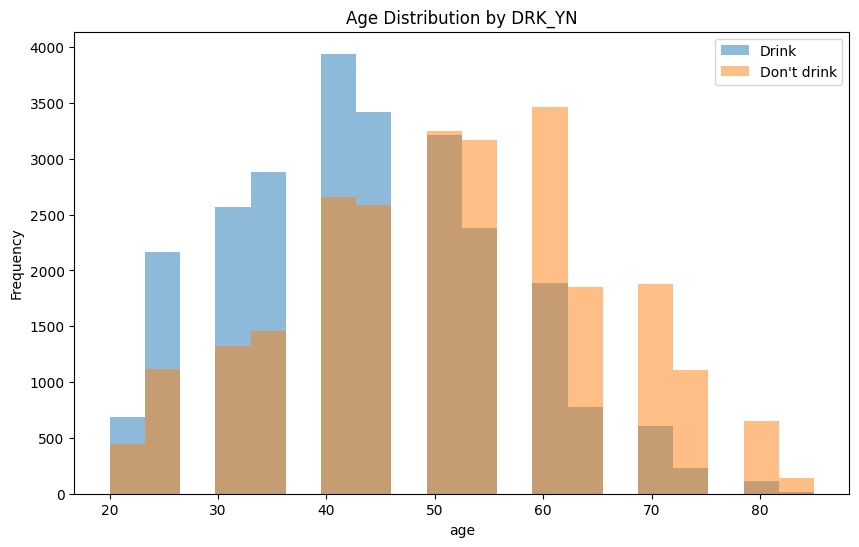

In [20]:
drk_1 = drink[drink['DRK_YN'] == 1]
drk_2 = drink[drink['DRK_YN'] == 0]


# Plotting
plt.figure(figsize=(10, 6))
plt.hist(drk_1['age'], bins=20, alpha=0.5, label='Drink')
plt.hist(drk_2['age'], bins=20, alpha=0.5, label="Don't drink")

plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution by DRK_YN')
plt.legend()
plt.show()


**Disease or  Not Disease by drink base on the hemoglobin and urin protein**

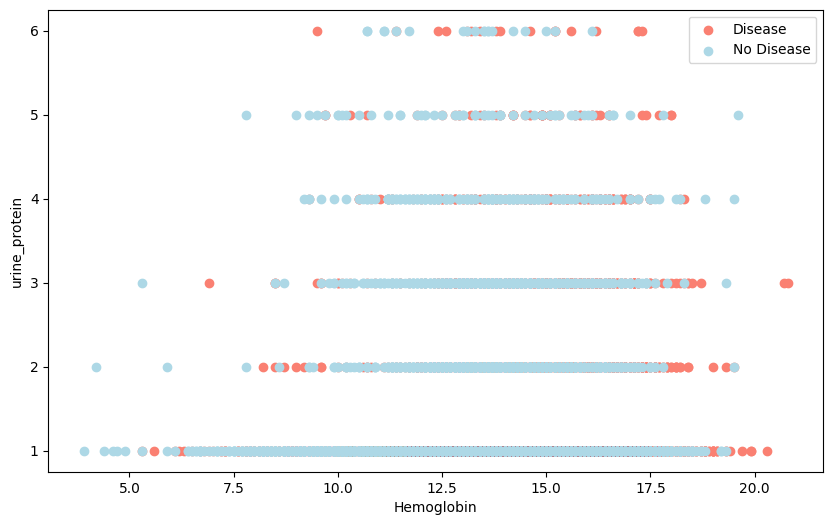

In [21]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(drink.hemoglobin[drink.DRK_YN==1],
            drink.urine_protein[drink.DRK_YN==1],
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(drink.hemoglobin[drink.DRK_YN==0],
            drink.urine_protein[drink.DRK_YN==0],
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.xlabel("Hemoglobin")
plt.legend(["Disease", "No Disease"])
plt.ylabel("urine_protein");


**Gender Distribution by DRK_YN** ,

**(Y=1 ,N=0)**

<ipython-input-23-5c30969c3263>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(['female','male'])


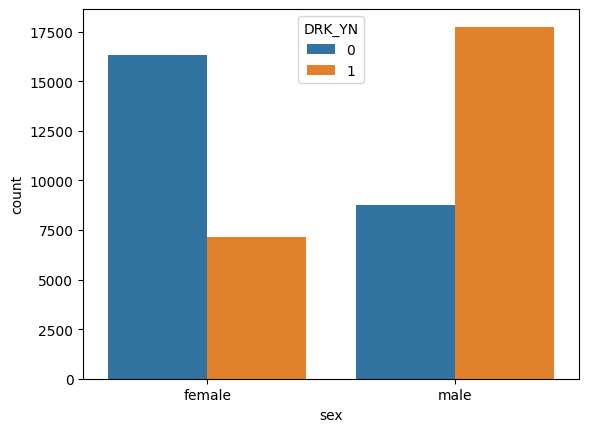

In [23]:
g=sns.countplot(x='sex' ,data=drink, hue='DRK_YN')
g.set_xticklabels(['female','male'])
plt.show(g)

**Histograms by Urin Protein and Hemoglobin**

Text(0.5, 1.0, 'urine_protein')

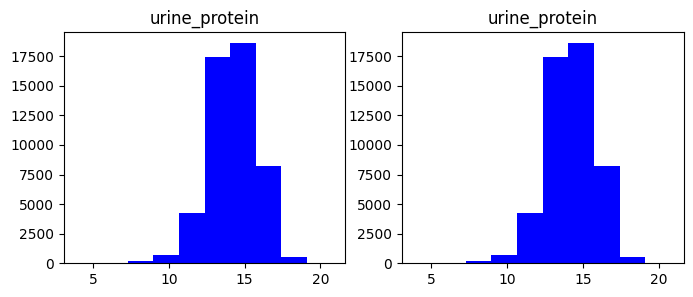

In [22]:
fig,axes = plt.subplots (nrows=1,ncols=2,figsize =(8,3))


axes[0].hist(drink['hemoglobin'],color = 'blue')
axes[0].set_title('urine_protein')
axes[1].hist(drink['hemoglobin'],color = 'blue')
axes[1].set_title('urine_protein')

**Heatmap of all attributes**

<Axes: >

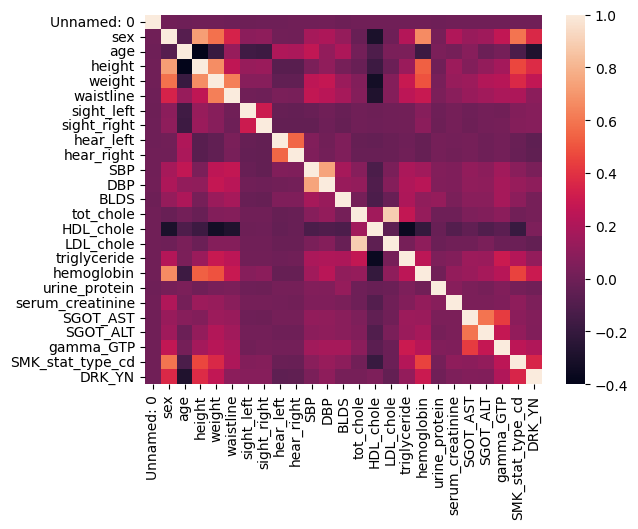

In [24]:
sns.heatmap(drink.corr(),cbar=True)
#plt.xticks(rotation=270)

In [16]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
drink['sex']=label_encoder.fit_transform(drink['sex' ])

In [17]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
drink['DRK_YN']=label_encoder.fit_transform(drink['DRK_YN' ])

In [25]:
drink.drop(['SMK_stat_type_cd','Unnamed: 0'],axis=1,inplace=True)

In [26]:
X=drink.iloc[ :,0:20].values
Y=drink['DRK_YN'].values
print(type(Y))

<class 'numpy.ndarray'>


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(33333, 20)
(16667, 20)
(33333,)
(16667,)


In [57]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=7, min_samples_leaf=5)
clf.fit(X_train,Y_train)
Y_predict=clf.predict(X_test)
print(Y_predict)
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_predict)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,Y_predict))

[3. 1. 3. ... 1. 1. 1.]
[[8041  876 1213]
 [ 527 1049 1321]
 [ 874  658 2108]]
Accuracy score : 0.6718665626687467


In [31]:
Y_predict=clf.predict(X_test)
print(Y_predict)

[0 1 1 ... 0 0 1]


In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_predict)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,Y_predict))

[[8041  876 1213]
 [ 527 1049 1321]
 [ 874  658 2108]]
Accuracy score : 0.6718665626687467


<Axes: title={'center': 'Confusion_matrix'}>

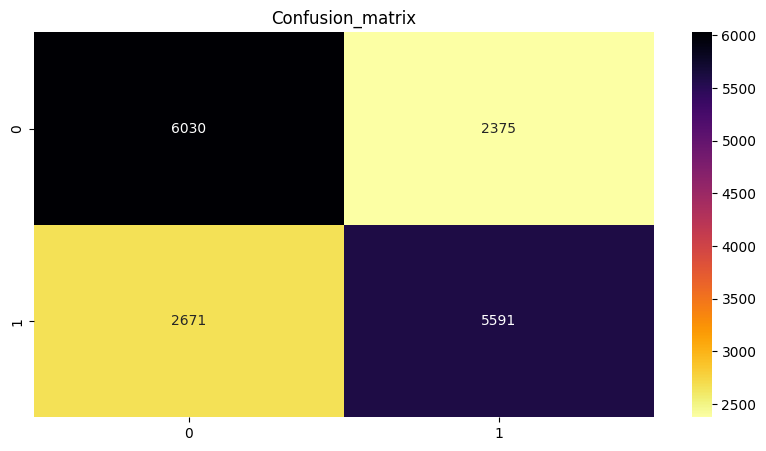

In [33]:
#plotting the confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion_matrix')
sns.heatmap(cm,annot=True,fmt='d',cmap='inferno_r')

In [35]:
smoke.head(10)

,Unnamed: 0,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,907693,Female,20,160,80,87.0,0.4,0.4,1.0,1.0,...,86.0,56.0,12.0,1.0,0.8,12.0,12.0,16.0,1.0,N
1,287742,Male,30,170,65,76.0,0.7,1.0,1.0,1.0,...,123.0,33.0,14.1,1.0,0.9,17.0,13.0,11.0,1.0,N
2,284105,Male,35,185,85,86.0,0.4,0.2,1.0,1.0,...,83.0,105.0,15.6,1.0,1.2,19.0,19.0,30.0,1.0,Y
3,38943,Female,60,155,60,85.0,1.0,0.8,1.0,1.0,...,107.0,114.0,14.5,1.0,0.7,29.0,26.0,29.0,1.0,N
4,40248,Male,40,155,60,78.8,1.0,0.5,1.0,1.0,...,112.0,84.0,15.8,1.0,0.7,18.0,17.0,39.0,1.0,N
5,910340,Female,40,165,55,64.2,1.0,1.2,1.0,1.0,...,67.0,73.0,13.5,1.0,0.7,26.0,14.0,12.0,1.0,N
6,663526,Male,45,170,70,81.0,0.9,0.8,1.0,1.0,...,128.0,169.0,16.7,1.0,0.8,17.0,19.0,26.0,3.0,Y
7,637480,Female,45,155,50,67.0,0.3,0.2,1.0,1.0,...,128.0,85.0,13.6,1.0,0.7,17.0,9.0,12.0,1.0,N
8,600516,Male,45,175,65,78.7,1.0,1.0,1.0,1.0,...,99.0,78.0,13.9,1.0,1.1,21.0,16.0,17.0,1.0,Y
9,149454,Male,40,175,75,92.0,1.5,1.5,1.0,1.0,...,137.0,73.0,12.0,1.0,0.9,15.0,14.0,11.0,1.0,Y


In [34]:
smoke.describe()

,Unnamed: 0,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,495482.532020,47.554800,162.264500,63.255100,81.217812,0.98429,0.976056,1.031160,1.029900,122.518920,...,56.945560,113.113140,131.971180,14.236432,1.095260,0.862490,25.928580,25.859940,37.103120,1.606600
std,286519.106374,14.203451,9.275789,12.449374,11.890719,0.63158,0.590159,0.173752,0.170313,14.573681,...,15.036581,35.747604,100.372138,1.587288,0.442978,0.578108,16.769321,34.228255,49.228851,0.818419
min,30.000000,20.000000,130.000000,25.000000,30.000000,0.10000,0.100000,1.000000,1.000000,72.000000,...,1.000000,1.000000,6.000000,3.900000,1.000000,0.100000,2.000000,1.000000,1.000000,1.000000
25%,246210.750000,35.000000,155.000000,55.000000,74.400000,0.70000,0.700000,1.000000,1.000000,112.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,494460.500000,45.000000,160.000000,60.000000,81.000000,1.00000,1.000000,1.000000,1.000000,121.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,744046.000000,60.000000,170.000000,70.000000,87.500000,1.20000,1.200000,1.000000,1.000000,131.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,30.000000,40.000000,2.000000
max,991322.000000,85.000000,190.000000,130.000000,999.000000,9.90000,9.900000,2.000000,2.000000,224.000000,...,520.000000,1580.000000,2629.000000,20.800000,6.000000,80.000000,794.000000,4633.000000,999.000000,3.000000


In [36]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        50000 non-null  int64  
 1   sex               50000 non-null  object 
 2   age               50000 non-null  int64  
 3   height            50000 non-null  int64  
 4   weight            50000 non-null  int64  
 5   waistline         50000 non-null  float64
 6   sight_left        50000 non-null  float64
 7   sight_right       50000 non-null  float64
 8   hear_left         50000 non-null  float64
 9   hear_right        50000 non-null  float64
 10  SBP               50000 non-null  float64
 11  DBP               50000 non-null  float64
 12  BLDS              50000 non-null  float64
 13  tot_chole         50000 non-null  float64
 14  HDL_chole         50000 non-null  float64
 15  LDL_chole         50000 non-null  float64
 16  triglyceride      50000 non-null  float6

In [37]:
smoke.isnull() .sum()

Unnamed: 0          0
sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

**Smoking Type** ,

1 Never

2 Used to smoke but quit

3 still smoke

<function matplotlib.pyplot.show(close=None, block=None)>

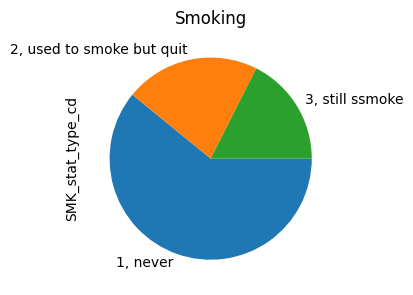

In [38]:
plt.figure(figsize=(15,15))

plt.subplot(1, 4, 3)
labels = ['1, never', '2, used to smoke but quit', '3, still ssmoke']
smoke['SMK_stat_type_cd'].value_counts().plot.pie(labels=labels, counterclock=False)
plt.title('Smoking')
plt.show

**Age Distribution by SMK_state_type_cd**




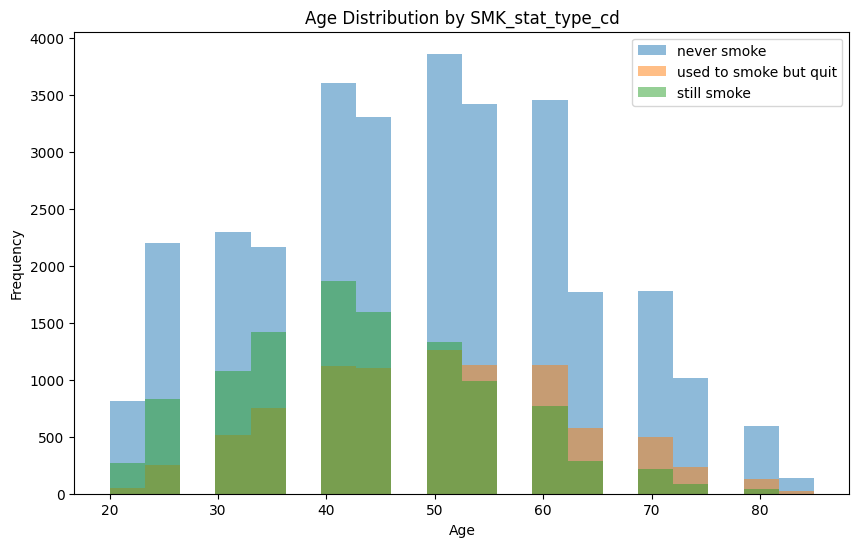

In [39]:
smk_1 = smoke[smoke['SMK_stat_type_cd'] == 1]
smk_2 = smoke[smoke['SMK_stat_type_cd'] == 2]
smk_3 = smoke[smoke['SMK_stat_type_cd'] == 3]

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(smk_1['age'],bins=20, alpha=0.5, label='never smoke')
plt.hist(smk_2['age'],bins=20, alpha=0.5,label='used to smoke but quit')
plt.hist(smk_3['age'],bins=20, alpha=0.5,label='still smoke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by SMK_stat_type_cd')
plt.legend()
plt.show()

**Hemogobin level - Smokers Vs Non-Smoker**

In [42]:
non_smokers = smoke[smoke['SMK_stat_type_cd'] == 1.0]
ex_smokers = smoke[smoke['SMK_stat_type_cd'] == 2.0]
smokers = smoke[smoke['SMK_stat_type_cd'] == 3.0]

Text(0.5, 1.0, 'Hemoglobin level - Smokers vs Non - Smokers')

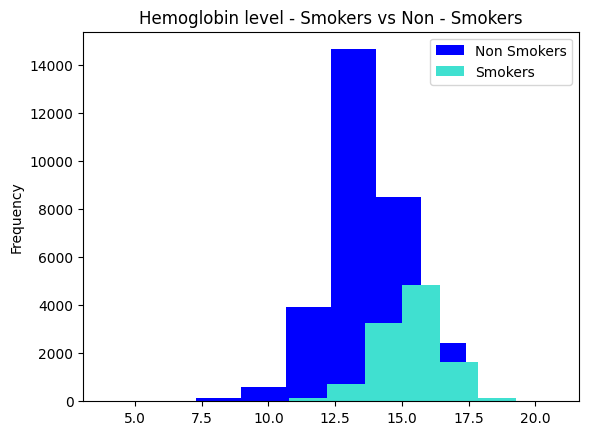

In [43]:
non_smokers['hemoglobin'].plot.hist(label='Non Smokers',legend=True,color='blue')
##non_smokers['hemoglobin'].plot.kde()
##ex_smokers['hemoglobin'].plot.hist(label = 'ex',legend=True)
smokers['hemoglobin'].plot.hist(label ='Smokers',legend=True,color='turquoise')
#smokers['hemoglobin'].plot.kde()
plt.title('Hemoglobin level - Smokers vs Non - Smokers')

In [44]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
smoke['sex']=label_encoder.fit_transform(smoke['sex'])

In [45]:
smoke.drop(['DRK_YN','Unnamed: 0'],axis=1,inplace=True)

In [46]:
X=smoke.iloc[ :,0:20].values
Y=smoke['SMK_stat_type_cd'].values
print(type(Y))

<class 'numpy.ndarray'>


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(33333, 20)
(16667, 20)
(33333,)
(16667,)


In [49]:
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=7, min_samples_leaf=5)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=100)

In [51]:
Y_predict=clf.predict(X_test)
print(Y_predict)

[3. 1. 3. ... 1. 1. 1.]


In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_predict)
print(cm)

#accuracy score of the model
print('Accuracy score :',accuracy_score(Y_test,Y_predict))

[[8041  876 1213]
 [ 527 1049 1321]
 [ 874  658 2108]]
Accuracy score : 0.6718665626687467


**Conclusion -** Utilizing machine learning algorithms and data visualization on a comprehensive dataset focused on smoking and drinking behaviors provides valuable insights. Through feature analysis, the model identifies key patterns and correlations between these habits and body signals, and Males exhibit higher instances of smoking and drinking. Evaluating health indicators, smokers show lower hemoglobin levels, elevated triglycerides, and blood pressure. and accurately classifies individuals at risk for diminished lung function, elevated heart rates, and liver abnormalities based on their smoking and drinking  Age distribution reveals increased habits in middle-aged individuals. Non-smokers generally maintain higher hemoglobin levels.
 The observed correlations with body signals underscore the need for nuanced approaches to address varying risk factors among individuals.

